In [144]:
import numpy as np 
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import load_iris   
from sklearn.model_selection import train_test_split

iris_dataset=load_iris() 
print(f'dataset data shape: {iris_dataset["data"].shape}')
print(f'dataset target shape: {iris_dataset["target"].shape}')

iris_pd=pd.DataFrame(data=np.concatenate([iris_dataset["data"],iris_dataset["target"][...,None]],axis=1),
            columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])  # 1st row as the column names
print(f'dataframe peek:\n{iris_pd.head()}')
print(f'dataframe describe:\n{iris_pd.describe()}')


dataset data shape: (150, 4)
dataset target shape: (150,)
dataframe peek:
   sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2    0.0
1           4.9          3.0           1.4          0.2    0.0
2           4.7          3.2           1.3          0.2    0.0
3           4.6          3.1           1.5          0.2    0.0
4           5.0          3.6           1.4          0.2    0.0
dataframe describe:
       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris_pd, hue='class', size=1.5);


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
X_train,X_test,Y_train,Y_test = train_test_split(iris_dataset["data"], iris_dataset["target"],test_size=0.25,random_state=0)
scoring ='accuracy'
models = [
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(gamma='auto'),
    MLPClassifier(hidden_layer_sizes=(10,5),activation='tanh',max_iter=2000,
      learning_rate_init=0.005,learning_rate='adaptive'),
]
results = []
for model in models:
	kfold = model_selection.KFold(n_splits=3, random_state=6) # seed
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)    
	print(f"{type(model).__name__} : {cv_results.mean():.4f} ({cv_results.std():.4f})")    


ImportError: cannot import name 'GMM' from 'sklearn.mixture' (C:\ProgramData\Miniconda3\lib\site-packages\sklearn\mixture\__init__.py)

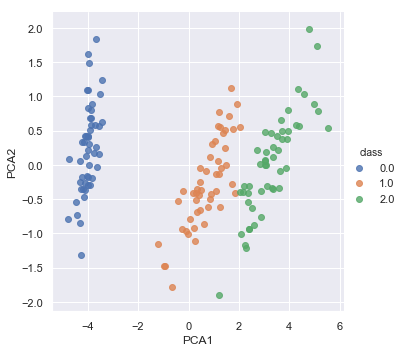

In [142]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(iris_pd)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(iris_pd)         # 4. Transform the data to two dimensions
iris_pd['PCA1'] = X_2D[:, 0]
iris_pd['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='class', data=iris_pd, fit_reg=False)


In [145]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(iris_pd)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(iris_pd)        # 4. Determine cluster labels

iris_pd['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris_pd, hue='class',
           col='cluster', fit_reg=False);


KeyError: "['PCA2', 'PCA1'] not in index"